In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("heart.csv")

In [6]:
new_columns = ["age","sex","cp","trtbps","chol","fbs","rest_ecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [10]:
df.columns = new_columns

In [12]:
numeric_var = ["age","trtbps","chol","thalach","oldpeak"]
categoric_var = ["sex","cp","fbs","rest_ecg","exang","slope","ca","thal","target"]

In [14]:
df.drop(["chol","fbs","rest_ecg"],axis = 1, inplace =True)

In [16]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


#### Visualizing outliers

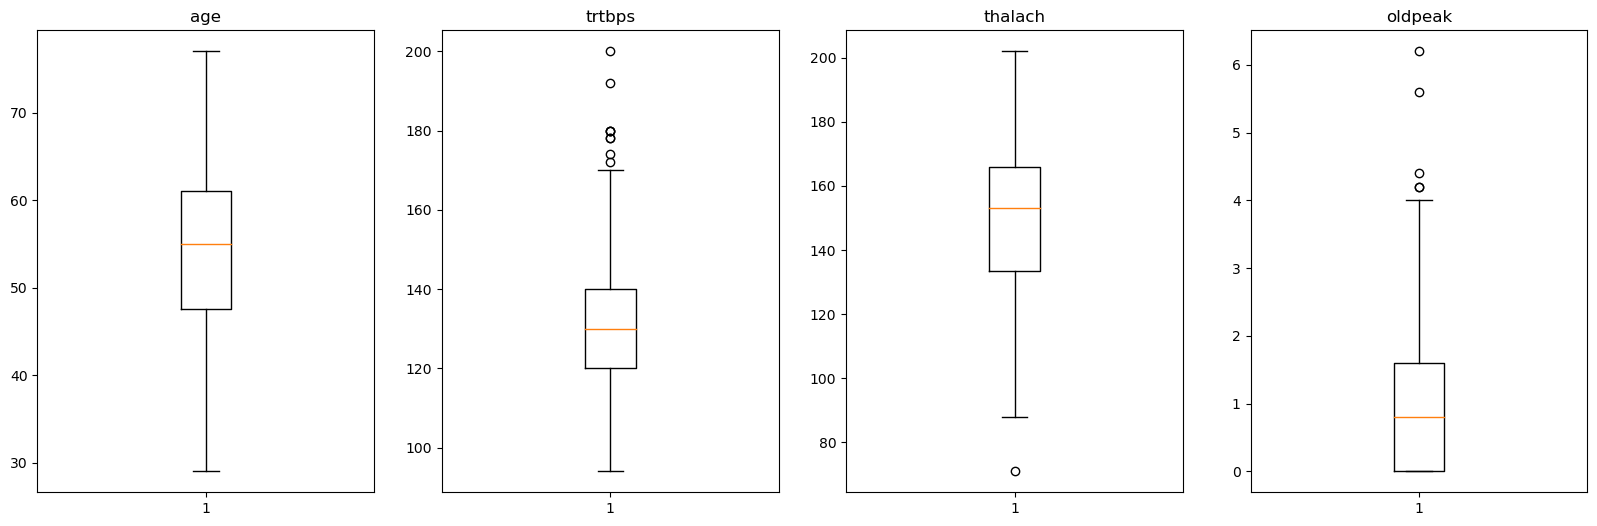

In [19]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

Age Variable:
We can see the exact image we want in this variable. There are no outliers. And the box stands at the midpoint of the whiskers.

Trtbps Variable:
There are more outliers in the "trtbps" variable than the others.
In terms of distribution, an image is very prone to normal distribution. The box appears near the middle of the two whiskers.

Oldpeak Variable:
There is no such thing as a lower whisker in the Oldpeak variable. The bottom of the box is at the level of the lower mustache. It means that the values are concentrated on the left side. So we can say that there is a queue to the right. So there is a right skew.
If we examine the mustache at the top, we can see the outliers above the mustache.

#### Dealing with Outliers

In [25]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [27]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1,4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print('-----------------------------------')

Threshold Value: 1
Number of Outliers: 51
-----------------------------------
Threshold Value: 2
Number of Outliers: 13
-----------------------------------
Threshold Value: 3
Number of Outliers: 2
-----------------------------------


In [29]:
df[z_scores_trtbps > 2][["trtbps"]] #2 threshold alaninin disinda olan outlierslar

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [31]:
df[z_scores_trtbps > 2].trtbps.min()

170

In [33]:
df[df["trtbps"] < 170].trtbps.max()

165

In [35]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"],165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [37]:
1 - winsorize_percentile_trtbps #Burada 1’den çıkardığımızda, dizide 165’in üzerindeki gözlemlerin oranını elde ederiz

0.04290429042904298

In [39]:
trtbps_winsorize = winsorize(df.trtbps,(0,(1 - winsorize_percentile_trtbps)))

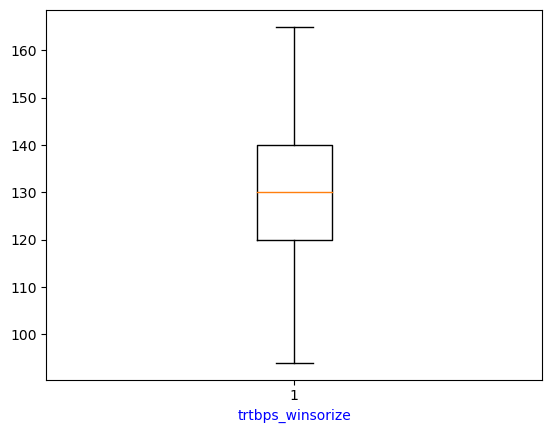

In [41]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize",color="b")
plt.show()

In [43]:
df["trtbps_winsorize"] = trtbps_winsorize

In [45]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


#### Interquartile Range Method

In [48]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 = np.quantile(df[var],0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)

    return df[(df[var]<lower_v) | (df[var] > upper_v)]

In [50]:
thalach_out = iqr(df,"thalach")

In [52]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [54]:
df.drop([272],axis=0,inplace=True)

In [56]:
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x308125a90>,
 'caps': [<matplotlib.lines.Line2D at 0x308126f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x308125190>],
 'medians': [<matplotlib.lines.Line2D at 0x308127d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x308134550>],
 'means': []}

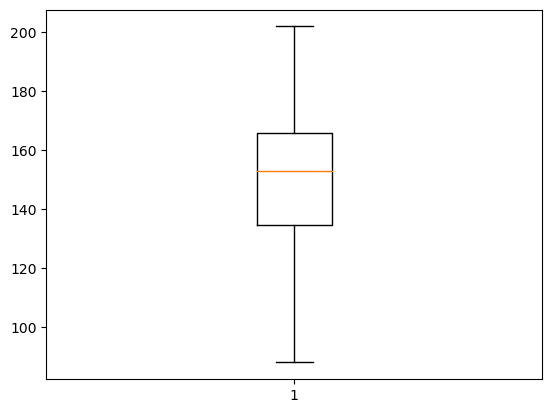

In [59]:
plt.boxplot(df["thalach"])

##### Oldpeak Variable

In [61]:
def iqr(df,var):
    q1 = np.quantile(df[var],0.25)
    q3 = np.quantile(df[var],0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)

    return df[(df[var]<lower_v) | (df[var] > upper_v)]

In [63]:
iqr(df,"oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [65]:
df[df["oldpeak"]< 4.2].oldpeak.max()

4.0

In [69]:
winsorize_percentile_oldpeak =(stats.percentileofscore(df["oldpeak"],4))/100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [71]:
oldpeak_winsorize = winsorize(df.oldpeak,(0,(1 - winsorize_percentile_oldpeak)))

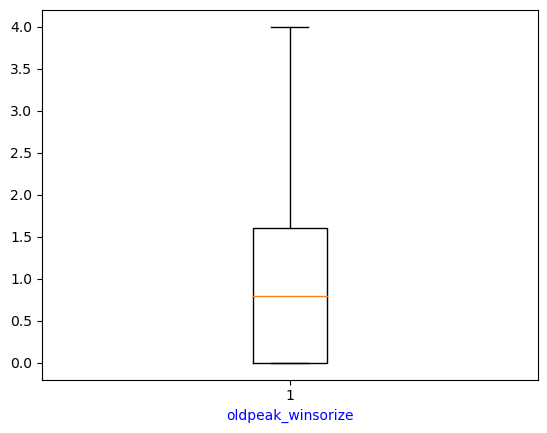

In [73]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize",color="b")
plt.show()

In [75]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [77]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [79]:
df.drop(["trtbps","oldpeak"],axis=1,inplace=True) #removing the old values

In [81]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


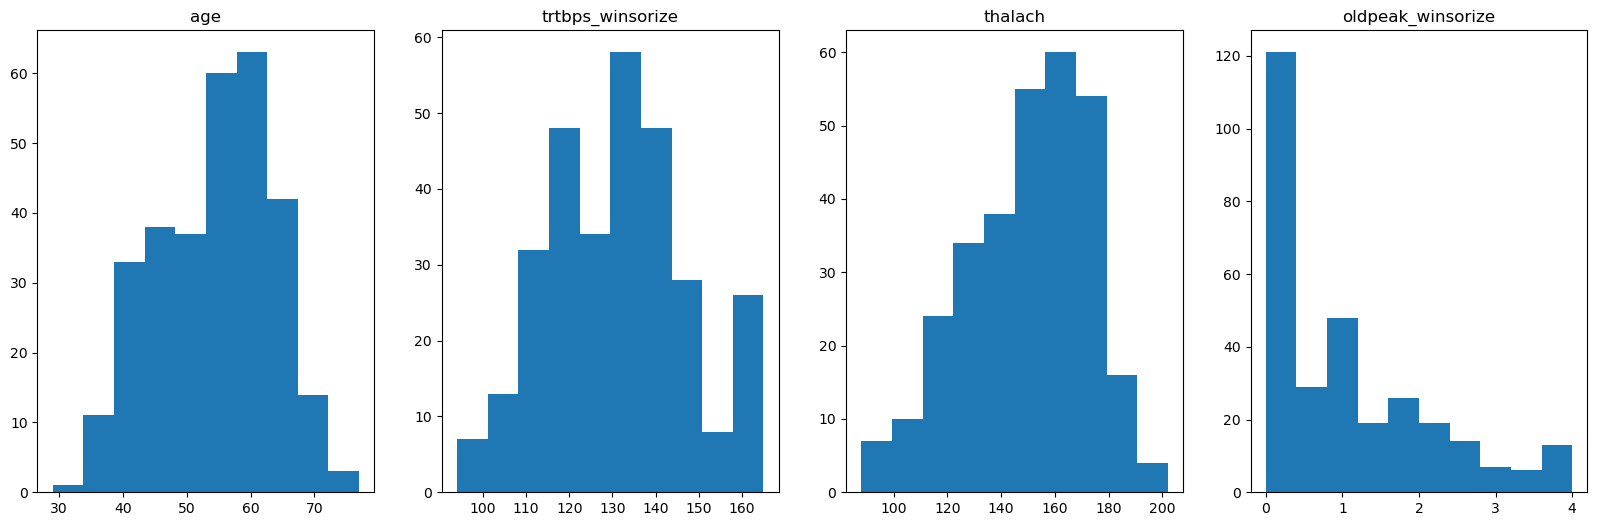

In [85]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [87]:
df[["age","trtbps_winsorize","thalach","oldpeak_winsorize"]].agg(["skew"]).transpose()
#carpiklik(skewness) hesaplamasi

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


In [93]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [95]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [99]:
df[["oldpeak_winsorize","oldpeak_winsorize_log","oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


If the skewness value os between -0.5 and 0.5 the variable is symmetrical

In [102]:
df.drop(["oldpeak_winsorize","oldpeak_winsorize_log"],axis=1,inplace=True)

In [104]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


#### Applying One Hot Encoding

In [139]:
df_copy = df.copy()

In [141]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [143]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [145]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

ValueError: list.remove(x): x not in list

In [147]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [149]:
df_copy = pd.get_dummies(df_copy,columns = categoric_var[:-1],drop_first=True,dtype=int)

In [151]:
df_copy

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,123,0,140,0.447214,0,0,0,0,1,1,0,0,0,0,0,0,0,1
299,45,132,0,110,1.095445,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,68,141,0,144,1.843909,1,0,0,0,0,1,0,0,1,0,0,0,0,1
301,57,115,0,130,1.095445,1,0,0,0,1,1,0,1,0,0,0,0,0,1


In [153]:
new_numeric_var = ["age","thalach","trtbps_winsorize","oldpeak_winsorize_sqrt"]

In [161]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [163]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

Robust Scaler : Ortalamayı değil medyanı, standart sapma yerine Çeyreklikler Arası Aralık (IQR: interquartile range = Q3–Q1) kullanır
Ne zaman kullanilir : Veride ağır aykırı değerler (outlier) bulunuyorsa.

StandardScaler : Her özelliği (feature) ortalaması 0, standart sapması 1 olacak şekilde dönüştürür 
Ne zaman kullanılır?
Veriniz büyük oranda normal (Gaussian) dağılım gösteriyorsa.
Pek aşırı aykırı değer (outlier) içermiyorsa veya aykırı değerleri baştan temizlediyseniz.

In [167]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,0,1,0


#### Separating Data into Test and Training Set

In [170]:
from sklearn.model_selection import train_test_split 

In [172]:
X = df_copy.drop(["target"],axis=1)
y = df_copy[["target"]]

In [174]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=3)

In [176]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,1,0,0,0,1,1,0,1,0,0,0,0,0,1
82,0.363636,0.222222,-1.40,-0.707107,0,0,1,0,0,0,1,1,0,0,0,0,1,0
187,-0.072727,-1.396825,-0.30,0.465497,1,0,0,0,1,1,0,1,0,0,0,0,0,1
259,-1.236364,0.920635,-0.50,0.833997,1,0,0,1,1,1,0,0,0,0,0,0,0,1
5,0.145455,-0.158730,0.50,-0.207107,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [178]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [182]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


#### Logistic Regression Algorithm

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [202]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [206]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [208]:
y_pred =log_reg.predict(X_test)

In [210]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [212]:
accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


##### Cross Validation

In [215]:
from sklearn.model_selection import cross_val_score

In [217]:
scores = cross_val_score(log_reg,X_test,y_test,cv=10)
print("Cross-Validation Accuracy Scores",scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


In [219]:
# we almost got the same result so our model has not just memorize the data, our model is fine

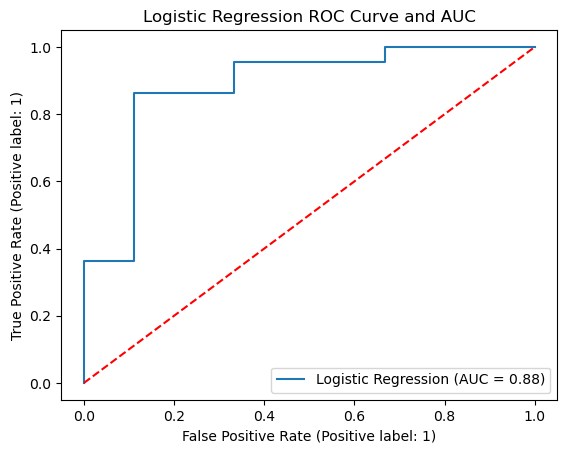

In [229]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# ROC eğrisini çizdir
RocCurveDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    name="Logistic Regression"
)

# Başlık ve referans çizgisi
plt.title("Logistic Regression ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--") #kirmizi renkte kesik cizgi 
plt.show()


In [231]:
#Bizim mavi egrimiz bu cizginin ustundeyse rassal tahminden daha iyi performans veriyor demek
#0.88 = Very good

#### Hyperparameter Optimization

In [234]:
from sklearn.model_selection import GridSearchCV

In [236]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [238]:
parameters = {"penalty" : ["l1","l2"],"solver" : ["newton-cg","lbfgs","liblinear","sag","saga"]}

In [240]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [242]:
log_reg_grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [244]:
print("Best Parameters: ",log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [246]:
log_reg_new2 = LogisticRegression(penalty="l1",solver="saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [248]:
log_reg_new2.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='saga')

In [250]:
y_pred =log_reg_new2.predict(X_test)

In [252]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test,y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


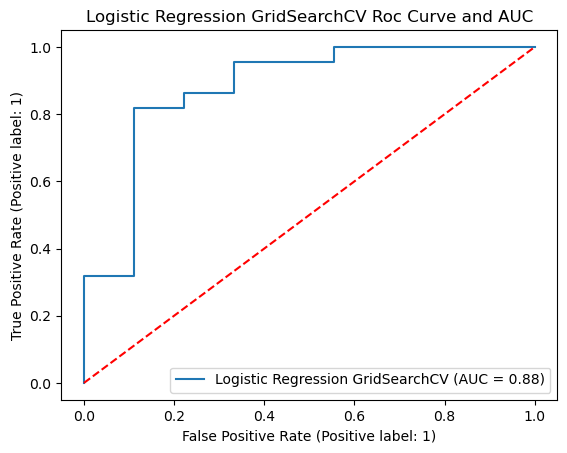

In [256]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_estimator(
    log_reg_new2,
    X_test,
    y_test,
    name="Logistic Regression GridSearchCV"
)


plt.title("Logistic Regression GridSearchCV Roc Curve and AUC")
plt.plot([0, 1], [0, 1], "r--") #kirmizi renkte kesik cizgi 
plt.show()


#### Decision Tree Algorithm

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [263]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=5)

In [265]:
y_pred = dec_tree.predict(X_test)

In [267]:
print("The best accuracy score of Decision tree is: " , accuracy_score(y_test,y_pred))

The best accuracy score of Decision tree is:  0.7096774193548387


In [269]:
scores = cross_val_score(dec_tree,X_test,y_test,cv=10)
print("Cross-Validation Accuracy Scores",scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333333


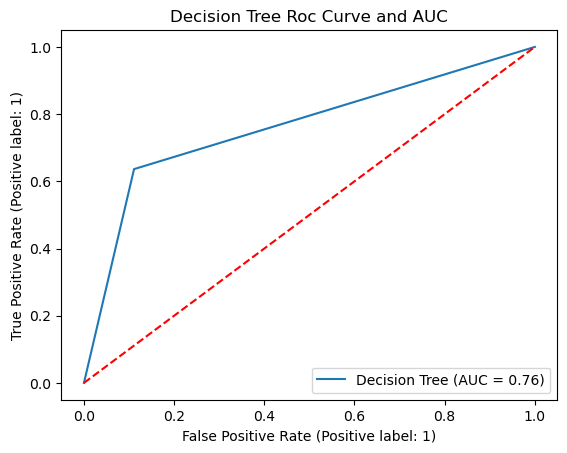

In [271]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_estimator(
    dec_tree,
    X_test,
    y_test,
    name="Decision Tree"
)


plt.title("Decision Tree Roc Curve and AUC")
plt.plot([0, 1], [0, 1], "r--") #kirmizi renkte kesik cizgi 
plt.show()


#### Support Vector Machine Algorithm

In [275]:
from sklearn.svm import SVC

In [277]:
svc_model = SVC(random_state = 5)

In [279]:
svc_model.fit(X_train,y_train)

SVC(random_state=5)

In [281]:
y_pred = svc_model.predict(X_test)

In [283]:
print("The test accuracy score of SVM is: " , accuracy_score(y_test,y_pred))

The test accuracy score of SVM is:  0.8709677419354839


In [285]:
scores = cross_val_score(svc_model,X_test,y_test,cv=10)
print("Cross-Validation Accuracy Scores",scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333334


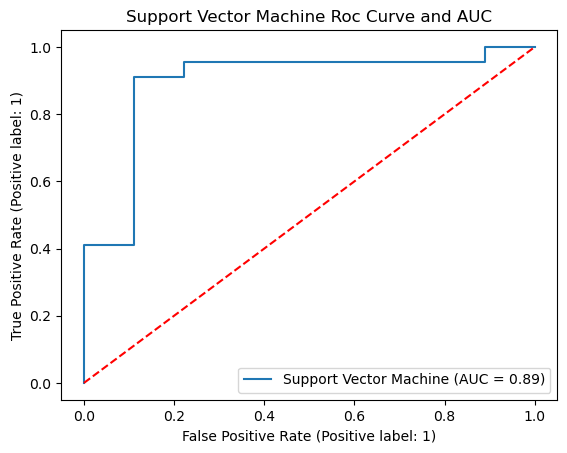

In [287]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_estimator(
    svc_model,
    X_test,
    y_test,
    name="Support Vector Machine"
)


plt.title("Support Vector Machine Roc Curve and AUC")
plt.plot([0, 1], [0, 1], "r--") #kirmizi renkte kesik cizgi 
plt.show()


#### Random Forest Algorithm

In [290]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
random_forest = RandomForestClassifier(random_state=5)

In [294]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [296]:
y_pred = random_forest.predict(X_test)

In [298]:
print("The test accuracy score of Random Forest is : " , accuracy_score(y_test,y_pred))

The test accuracy score of Random Forest is :  0.8709677419354839


In [302]:
scores = cross_val_score(random_forest,X_test,y_test,cv=10)
print("Cross-Validation Accuracy Scores",scores.mean())

Cross-Validation Accuracy Scores 0.8999999999999998


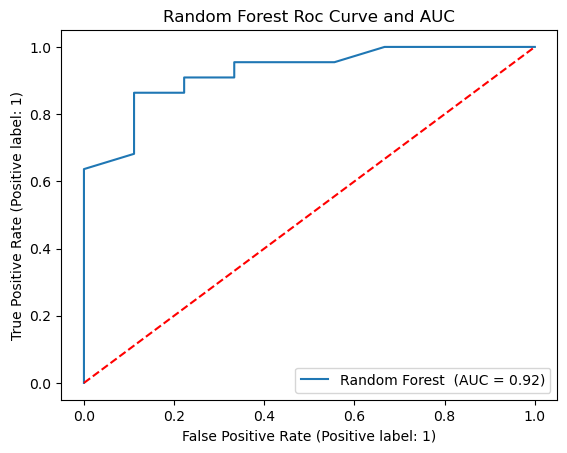

In [304]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_estimator(
    random_forest,
    X_test,
    y_test,
    name="Random Forest "
)


plt.title("Random Forest Roc Curve and AUC")
plt.plot([0, 1], [0, 1], "r--") #kirmizi renkte kesik cizgi 
plt.show()


In [306]:
# this one is the better than the others

#### Hyperparamtere Optimization

In [311]:
random_forest_new = RandomForestClassifier(random_state=5)
random_forest_new

RandomForestClassifier(random_state=5)

In [315]:
parameters = {"n_estimators" : [50,100,150,200],
              "criterion" : ["gini","entropy"],
              "max_features" : ['auto','sqrt','log2'],
              "bootstrap" : [True,False]}

In [317]:
random_forest_grid = GridSearchCV(random_forest_new,param_grid = parameters)

In [319]:
random_forest_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [323]:
print("Best Parameters :" , random_forest_grid.best_params_)

Best Parameters : {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}


In [329]:
random_forest_new2 = RandomForestClassifier(bootstrap = False,criterion = "entropy",max_features = "sqrt",n_estimators = 150 , random_state = 5)

In [331]:
random_forest_new2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=150,
                       random_state=5)

In [333]:
y_pred = random_forest_new2.predict(X_test)

In [335]:
print("The accuracy score of Random Forest after hyper-parameter tuning : " , accuracy_score(y_test,y_pred))

The accuracy score of Random Forest after hyper-parameter tuning :  0.8709677419354839


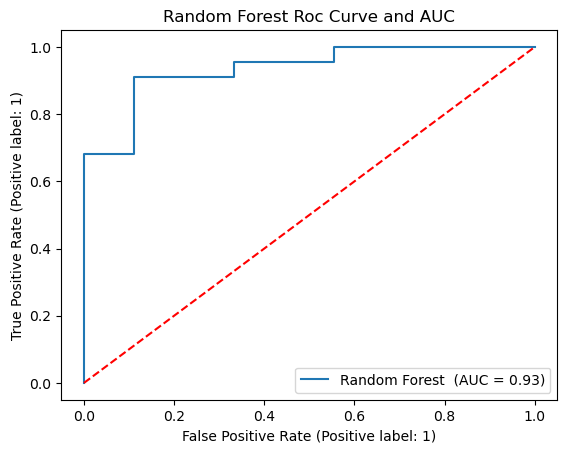

In [337]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_estimator(
    random_forest_new2,
    X_test,
    y_test,
    name="Random Forest "
)


plt.title("Random Forest Roc Curve and AUC")
plt.plot([0, 1], [0, 1], "r--") #kirmizi renkte kesik cizgi 
plt.show()
